In [30]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import Gaussian, Schmidt, Exponential, Lowdin, Lrz, Overlap
import matplotlib.pyplot as plt
import scipy as sc
from tabulate import tabulate

In [2]:
# Calculate the probability of an outcome for detector
def calculate_proba(n,m,measure,allstateprobs_iterator):
    r"""
    gives the probability of an output measurement
    :param n: number of spatial states
    :param m: number of internal states
    :param measure: array of how much photon we expect for each captor (array 1,n)
    :param allstateprobs_iterator: An iterator containing states and probabilities of the simulation
    :return: float probability
    """
    Proba = 0
    k = 0
    theta = np.pi/4
    c = [np.cos(theta),np.sin(theta)]
    for state, probabilitie in allstateprobs_iterator:
        ls = list(state)
        #print(state,probabilitie)
        capt = []
        for i in range(n):
            capt.append(np.sum(ls[i::n]))
        #print(capt)
        if np.all(capt==measure):
            #print(state)
            #print(probabilitie)
            Proba += probabilitie
        k+=1
    return Proba

def create_inputs(enterFunc,Coefs,Dictionnary = None): 
    #enterFunc is the distribution in space of the entry in the system ex: [1,1]
    if any(np.array(enterFunc)>1):
        raise Exception('Cannot be more than 1 photon per spatial mode')
        
    internMode = np.sum(enterFunc)
    spatialMode = len(enterFunc)
    nbPhoton = np.sum(enterFunc)
    L = spatialMode*internMode 

    Inputs = []
    for x in itertools.combinations(range(L), nbPhoton) :
        inputsTemps = [1 if i in x else 0 for i in range(L)]
        Inputs.append(np.array(inputsTemps))
    
    realInputs = []

    for i in range(len(Inputs)):
        compare = np.zeros(spatialMode)
        for ii in range(0,L,spatialMode):
            compare += Inputs[i][ii:ii+spatialMode]

        if np.all(compare == enterFunc):
            realInputs.append(Inputs[i])
    #print(realInputs)
    c = []
    Arr = np.squeeze(Coefs)
    
    for i in range(len(realInputs)):
        ArrCond = np.array(realInputs[i]).reshape(internMode,spatialMode).T
        y = np.ma.masked_array(Arr, abs(ArrCond-1))
        c.append(np.prod(y))

    k = 0

    if isinstance(Dictionnary,dict) and len(Dictionnary)!=0:
        testdict = {}

        iterkeys = itertools.permutations(Dictionnary.keys(),2)
        iterval = itertools.permutations(Dictionnary.values(),2)
        for i,j in zip(iterkeys,iterval) :
            dictkey = '|' + i[0] + ',' + i[1] + '>'
            dictval = j[0] + j[1]
            testdict[dictkey] = pcvl.BasicState(dictval)
        for i in realInputs:
            nameOfState = str(pcvl.BasicState(i))
            if k == 0:
                InputsBS = testdict[nameOfState]
                
            else:
                InputsBS = InputsBS + testdict[nameOfState]

            k += 1
        #Add the coefficient in the state vector
        k = 0
        for state,amplitude in InputsBS.items():

            InputsBS[state] = amplitude*c[k]
            k+=1
        
        return InputsBS,testdict
    else:     
        for i in realInputs:
            if k == 0 :
                InputsBS = pcvl.BasicState(i)
            else :
                InputsBS = InputsBS + pcvl.BasicState(i)
            k += 1
        #Add the coefficient in the state vector
        k = 0
        for state,amplitude in InputsBS.items():

            InputsBS[state] = amplitude*c[k]
            k+=1
        
        return InputsBS

Test CNOT

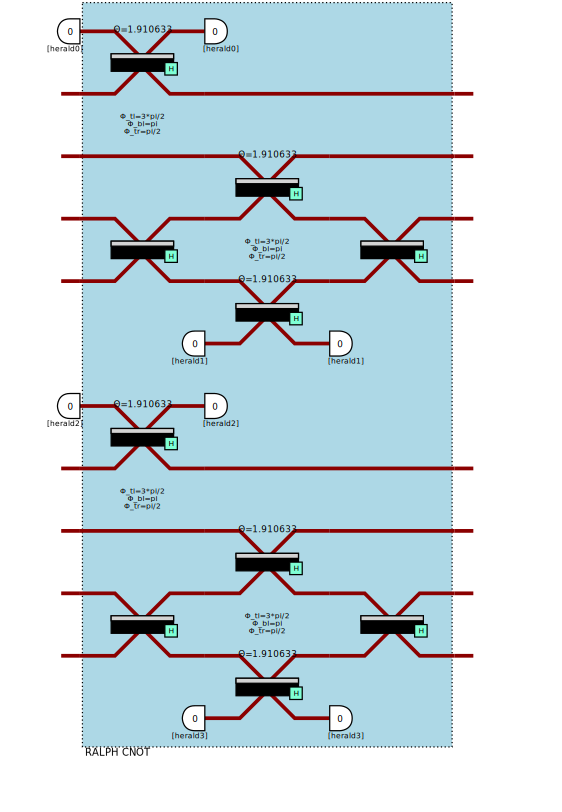

In [3]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [ ]:
statesdict = {
    "0,0": [1, 0, 1, 0],
    "0,1": [1, 0, 0, 1],
    "1,0": [0, 1, 1, 0],
    "1,1": [0, 1, 0, 1]
}



In [ ]:
## Getting the c vector 
env_type = 1  # 1=Gaussian, 2=exponential
N = 100  # number of x points to plot the wave functions
N_shift = 2  # total number of shifted wave functions
waves = np.zeros((N_shift, N))  # values for each wave function

sigma_wave = 0.5  # standard deviation of wave function
x = np.linspace(-16 * sigma_wave, 16 * sigma_wave, N)  # position values

shift_list=np.linspace(-8*sigma_wave,8*sigma_wave,100)
C2S=np.zeros(len(shift_list))

for k in range(len(shift_list)):
    shift=shift_list[k]
    x_shift=np.array([0,shift])
    for i in range(N_shift):
        waves[i] = Gaussian(x-x_shift[i], sigma_wave)

    new_base,coeffsS=Schmidt(waves,x)
    new_base,coeffsL = Lowdin(waves,x)
    C2S[k]=coeffsS[1,1]

In [ ]:
Probs = []
for coef in C2S:
    C = np.array([[0,0],[1,0],[0,0],[np.sqrt(1-coef ** 2),coef]])
    InputsBS = create_inputs([0,1,0,1],C)

    #print(InputsBS)


    pcvl.pdisplay(p, recursive = True)
    realOutput = {}
    for i in range(len(InputsBS)):
        miniState = InputsBS[i]
        #print(miniState,':',InputsBS[miniState])
        p.with_input(miniState)
        output = p.probs()['results']
        for ii in output.keys():
            if ii in realOutput.keys():
                realOutput[ii] = realOutput[ii] + output[ii] * abs(InputsBS[InputsBS[i]]) ** 2
            else:
                realOutput[ii] = output[ii] * abs(InputsBS[InputsBS[i]]) ** 2
    K = 0

    for i,j in zip(realOutput.keys(),realOutput.values()):
        #print(i,j)
        K += j

    #print(K)
    realOutputLs = list(realOutput.values())
    Probs.append(realOutputLs[0])



In [ ]:
plt.figure()
plt.plot(shift_list/1e9,Probs)
plt.xlabel(r'$\Delta z$')
plt.ylabel(r'$P(11 \rightarrow 10)$')

plt.show()

Create Random Values

In [34]:
## Getting the c vector 
env_type = 1  # 1=Gaussian, 2=exponential
N = 100  # number of x points to plot the wave functions
N_shift = 2  # total number of shifted wave functions
waves = np.zeros((N_shift, N))  # values for each wave function

sigma_wave = 0.5  # standard deviation of wave function
x = np.linspace(-16 * sigma_wave, 16 * sigma_wave, N)  # position values

shift_list=np.random.standard_cauchy(1)*sigma_wave/10

C2S=np.zeros(len(shift_list))

for k in range(len(shift_list)):
    shift=shift_list[k]
    x_shift=np.array([0,shift])
    for i in range(N_shift):
        waves[i] = Gaussian(x-x_shift[i], sigma_wave)

    new_base,coeffsS=Schmidt(waves,x)
    new_base,coeffsL = Lowdin(waves,x)
    C2S[k]=coeffsS[1,1] 

In [35]:
def create_CRand(i,coef):
    CRand = []
    RawInputs = []
    Expected = []
    if i==0:
        CRand.append(np.array([[1,0],[0,0],[np.sqrt(1-coef ** 2),coef],[0,0]])) #Input = [1,0,1,0] = 0,0 exp = 0,0
        RawInputs.append([1,0,1,0])
        Expected = [1,0,1,0]
    elif i==1:
        CRand.append(np.array([[1,0],[0,0],[0,0],[np.sqrt(1-coef ** 2),coef]])) #Input = [1,0,0,1] = 0,1 exp = 0,1
        RawInputs.append([1,0,0,1])
        Expected = [1,0,0,1]
    elif i==2:
        CRand.append(np.array([[0,0],[1,0],[np.sqrt(1-coef ** 2),coef],[0,0]])) #Input = [0,1,1,0] = 1,0 exp = 1,1
        RawInputs.append([0,1,1,0])
        Expected = [0,1,0,1]
    elif i==3:
        CRand.append(np.array([[0,0],[1,0],[0,0],[np.sqrt(1-coef ** 2),coef]])) #Input = [0,1,0,1] = 1,1 exp = 1,0
        RawInputs.append([0,1,0,1])
        Expected = [0,1,1,0]
    else :
        print('Epic Fail')
        return
    return CRand, np.squeeze(RawInputs), Expected

In [44]:
# Create the C manually because it is not yet implemented
statesdict = {
    pcvl.BasicState([1,0,1,0]) : "00",
    pcvl.BasicState([1,0,0,1]) : "01",
    pcvl.BasicState([0,1,1,0]) : "10",
    pcvl.BasicState([0,1,0,1]) : "11"
}


[1 0 1 0]
[1 0 0 1]
[0 1 1 0]
[0 1 0 1]


In [43]:
TableValue = []

for vars in range(4):

    statesProb = dict.fromkeys(statesdict.keys(),0)

    for coef in C2S:
        
        [C,Inputs,Expected] = create_CRand(vars,coef)
        InputsBS = create_inputs(Inputs,C)

        #print(InputsBS)


        pcvl.pdisplay(p, recursive = True)
        realOutput = {}
        for i in range(len(InputsBS)):
            miniState = InputsBS[i]
            #print(miniState,':',InputsBS[miniState])
            p.with_input(miniState)
            output = p.probs()['results']
            for ii in output.keys():
                if ii in realOutput.keys():
                    realOutput[ii] = realOutput[ii] + output[ii] * abs(InputsBS[InputsBS[i]]) ** 2
                else:
                    realOutput[ii] = output[ii] * abs(InputsBS[InputsBS[i]]) ** 2

        
        Prob = 0
        
        for states,val in zip(realOutput.keys(),realOutput.values()):
            ls = np.array(states)
            Cond = ls[0:4] + ls[4:]
            tempState = pcvl.BasicState(Cond)
            #print(tempState,val)
            if tempState in statesProb.keys():
                statesProb[tempState] += val

    results = {key: value / len(C2S) for key, value in statesProb.items()}
    TableValue.append(results)

In [38]:
table = [[] for i in range(len(statesdict.keys())+1)]
table[0] = list(statesdict.values())
k = 1
for i in statesdict.keys():
    l = 0
    for j in statesdict.keys():
        if l==0:
            table[k].append(statesdict[i])

        table[k].append(TableValue[k-1][j])
        
        l += 1
    k += 1

In [39]:
from tabulate import tabulate
print(table[4])
print(tabulate(table,headers='firstrow',tablefmt="fancy_grid"))

['11', 0.0, 0.0, 0.9973851527142404, 0.0026148472857595445]
╒════╤══════╤══════╤════════════╤════════════╕
│    │   00 │   01 │         10 │         11 │
╞════╪══════╪══════╪════════════╪════════════╡
│ 00 │    1 │    0 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 01 │    0 │    1 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 10 │    0 │    0 │ 0.00261485 │ 0.997385   │
├────┼──────┼──────┼────────────┼────────────┤
│ 11 │    0 │    0 │ 0.997385   │ 0.00261485 │
╘════╧══════╧══════╧════════════╧════════════╛


In [40]:
with open('shiftlist.txt','w+') as f:
    f.writelines(str(x_shift))
    f.writelines('\n')
    f.writelines(str(table))
